In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import  train_test_split

In [4]:
cancer=load_breast_cancer()

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [7]:
features=pd.DataFrame(cancer.data,columns=cancer.feature_names)
target=pd.DataFrame(cancer.target,columns=['target'])

In [8]:
df=pd.concat([features,target],axis=1)

In [9]:
correlation=df.corr('pearson')

In [10]:
correlation['target'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

In [11]:
X=df['worst concave points']#presently considering only one feature impacting the target
Z=df['worst perimeter']
Y=df['target']

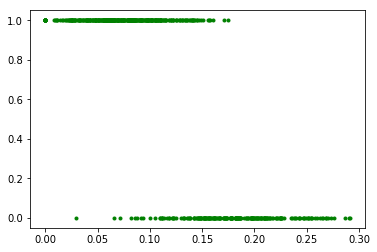

In [12]:
plt.plot(X,Y,'g.')

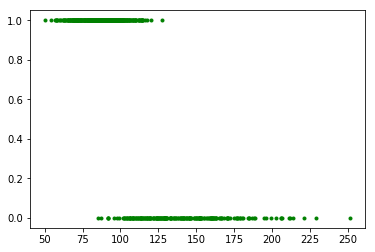

In [13]:
plt.plot(Z,Y,'g.')

In [14]:
x=np.array(X)
y=np.array(Y)
z=np.array(Z)
x=(x-x.min())/(x.max()-x.min())#didn't need to normalize y for its range is already 0 to 1
z=(z-z.min())/(z.max()-z.min())

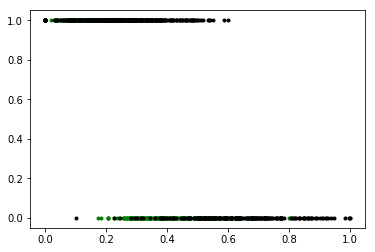

In [15]:
plt.plot(z,y,'g.',
         x,y,'k.')

In [16]:
x_train,x_test,z_train,z_test,y_train,y_test=train_test_split(x,z,y,test_size=0.25)

In [17]:
def hypothesis(a,b,c,x,z):
    return(1/(1+np.exp(-(a*x+b*z+c))))

In [18]:
def error(a,b,c,x,z,y):
    e=0
    m=len(x)
    for i in range(m):
        e+=-(y[i]*np.log(hypothesis(a,b,c,x[i],z[i])))-((1-y[i])*np.log(1-hypothesis(a,b,c,x[i],z[i])))
    return (1/m)*e

In [19]:
def step_gradient(a,b,c,x,z,y,learning_rate):
    grad_a=0
    grad_b=0
    grad_c=0
    m=len(x)
    for i in range(m):
        grad_a+=(hypothesis(a,b,c,x[i],z[i])-y[i])*x[i]
        grad_b+=(hypothesis(a,b,c,x[i],z[i])-y[i])*z[i]
        grad_c+=(hypothesis(a,b,c,x[i],z[i])-y[i])
    a=a-(grad_a*learning_rate)
    b=b-(grad_b*learning_rate)
    c=c-(grad_c*learning_rate)
    return a,b,c

In [20]:
def descend(init_a,init_b,init_c,x,z,y,learning_rate,iterations):
    a=init_a
    b=init_b
    c=init_c
    for i in range(iterations):
        e=error(a,b,c,x,z,y)
        if i%1000==0:
            print(f"error: {e}, a:{a}, b:{b}, c:{c}")
        a,b,c=step_gradient(a,b,c,x,z,y,learning_rate)
    return a,b,c

In [21]:
init_a=0
init_b=0
init_c=0
iterations=10000
learning_rate=0.01

In [20]:
final_a,final_b,final_c=descend(init_a,init_b,init_c,x_train,z_train,y_train,learning_rate,iterations)

error: 0.6931471805599468, a:0, b:0, c:0
error: 0.13832305875304746, a:-11.036109858771843, b:-18.335463664048422, c:10.542686904585992
error: 0.13277387739996038, a:-10.983383634043804, b:-22.905721462964426, c:11.85206819829199
error: 0.13128839176348567, a:-11.007545432903099, b:-25.285398849762476, c:12.559571915023765
error: 0.13077444371494257, a:-11.064884224650973, b:-26.683176200988836, c:12.99531314949508
error: 0.13057387885002594, a:-11.117642876438818, b:-27.554680071602313, c:13.274956733879486
error: 0.13049024392744196, a:-11.158165541038546, b:-28.11666087598531, c:13.458341073244402
error: 0.1304539594341687, a:-11.18742169837412, b:-28.486471810806727, c:13.580241212537125
error: 0.13043782194669268, a:-11.20800000032569, b:-28.732944549279054, c:13.66199764187575
error: 0.13043052883660972, a:-11.222294544388477, b:-28.8985710698295, c:13.717158588495028


In [21]:
final_a,final_b,final_c

(-11.232158855855522, -29.010473801280675, 13.75452547706592)

In [23]:
error(final_a,final_b,final_c,x_test,z_test,y_test)

0.13633308740959427

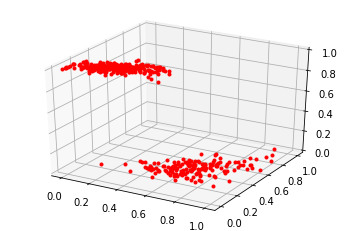

In [24]:
#plt.plot(x_train,y_train,'r.',
#     x_train,hypothesis(final_a,x_train,final_b),'g.')
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(x_train,z_train,y_train, 'r.')

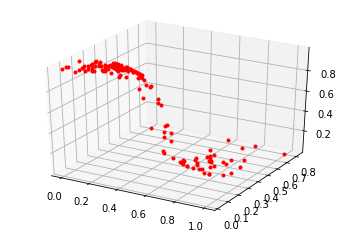

In [25]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(x_test,z_test,hypothesis(final_a,final_b,final_c,x_test,z_test), 'r.')

In [1]:
def accuracy(a,b,c,x,z,y):
    correct=0
    m=len(x)
    for i in range(m):
        pred=hypothesis(a,b,c,x[i],z[i])
        if pred>0.5:
            zz=1
        else:
            zz=0
        if y[i]==zz:
            correct+=1
    print(f"Accuracy: {correct/len(y)}")

In [2]:
accuracy(final_a,final_b,final_c,x_train,z_train,y_train)

NameError: name 'final_a' is not defined

In [65]:
accuracy(final_a,final_b,final_c,x_test,y_test,z_test)

Accuracy: 0.9440559440559441
